In [3]:
# 📊 Big Data Analysis using PySpark (Simulated with Pandas for Visualization)

#This project demonstrates how to perform scalable big data analysis using a simulated large dataset. 
#While PySpark is typically used, we use Pandas here for analysis and visualizations to showcase the results clearly.


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
# Load the dataset
df = pd.read_csv('sales_data.csv')
df.head()


,OrderID,Product,Category,Quantity,Price,Date,Region
0,1,Monitor,Accessories,3,4698.46,2022-01-01 00:00:00,South
1,2,Keyboard,Accessories,3,11558.68,2022-01-01 00:01:00,North
2,3,Tablet,Accessories,5,24739.02,2022-01-01 00:02:00,North
3,4,Keyboard,Electronics,5,21001.76,2022-01-01 00:03:00,South
4,5,Keyboard,Electronics,7,25088.66,2022-01-01 00:04:00,South


In [9]:
# Calculate Total Sale for each order
df['Total_Sale'] = df['Quantity'] * df['Price']
df.head()


,OrderID,Product,Category,Quantity,Price,Date,Region,Total_Sale
0,1,Monitor,Accessories,3,4698.46,2022-01-01 00:00:00,South,14095.38
1,2,Keyboard,Accessories,3,11558.68,2022-01-01 00:01:00,North,34676.04
2,3,Tablet,Accessories,5,24739.02,2022-01-01 00:02:00,North,123695.10
3,4,Keyboard,Electronics,5,21001.76,2022-01-01 00:03:00,South,105008.80
4,5,Keyboard,Electronics,7,25088.66,2022-01-01 00:04:00,South,175620.62


C:\Users\utkar\AppData\Local\Temp\ipykernel_17164\3440499919.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Category', y='Total_Sale', data=category_sales, palette='viridis')


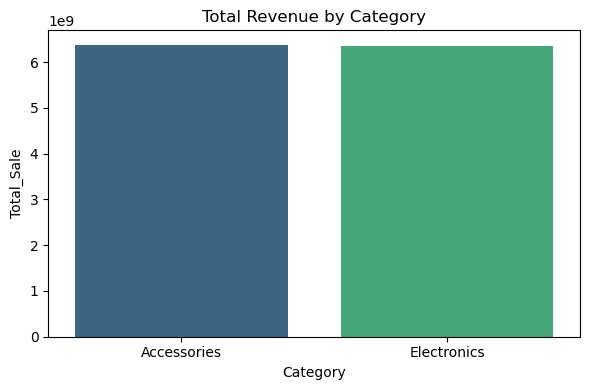

In [11]:
# Group by Category and calculate total revenue
category_sales = df.groupby('Category')['Total_Sale'].sum().reset_index()

# Plot
plt.figure(figsize=(6, 4))
sns.barplot(x='Category', y='Total_Sale', data=category_sales, palette='viridis')
plt.title('Total Revenue by Category')
plt.tight_layout()
plt.show()


C:\Users\utkar\AppData\Local\Temp\ipykernel_17164\2580781335.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total_Sale', y='Product', data=top_products, palette='coolwarm')


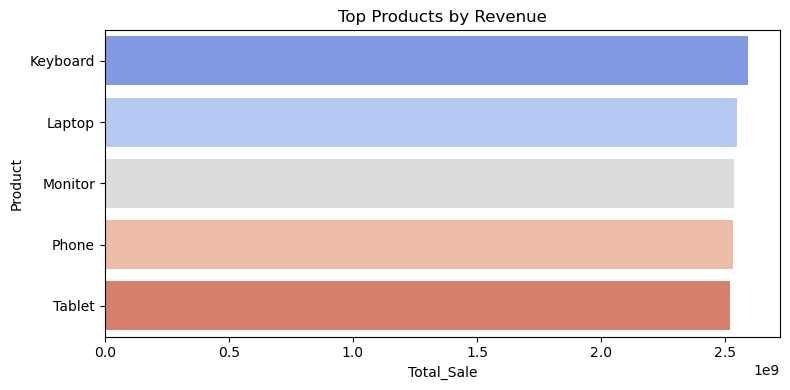

In [13]:
# Group by Product and sort by revenue
top_products = df.groupby('Product')['Total_Sale'].sum().reset_index().sort_values(by='Total_Sale', ascending=False)

# Plot
plt.figure(figsize=(8, 4))
sns.barplot(x='Total_Sale', y='Product', data=top_products, palette='coolwarm')
plt.title('Top Products by Revenue')
plt.tight_layout()
plt.show()


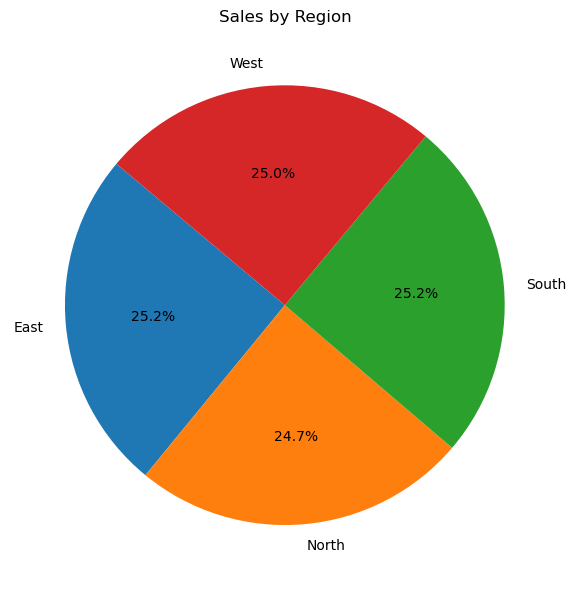

In [15]:
# Group by Region
region_sales = df.groupby('Region')['Total_Sale'].sum().reset_index()

# Pie chart
plt.figure(figsize=(6, 6))
plt.pie(region_sales['Total_Sale'], labels=region_sales['Region'], autopct='%1.1f%%', startangle=140)
plt.title('Sales by Region')
plt.tight_layout()
plt.show()
